# Example - The churn model

### Introduction

The term **churn** is used in marketing to refer to a customer leaving the company in favour of a competitor. Churning is a common concern of **Customer Relationship Management** (CRM). A key step in proactive churn management is to predict whether a customer is likely to churn, since an early detection of the potential churners helps to plan the retention campaigns.

In this example, I develop a churn model, based on a **logistic regression equation**, for a company called *Omicron Mobile*, which provides mobile phone services. The data set is based on a random sample of 5,000 customers whose accounts were still alive by September 30, and have been monitored during the fourth quarter. 968 of those customers churned during the fourth quarter, a **churning rate** of 19.4%.

### The data set

The variables included in the data set are: 

* `id`, a customer ID (the phone number).

* `aclentgh`, the number of days the account has been active at the beginning of the period monitored.

* `intplan`, a dummy for having an international plan.

* `dataplan`, a dummy for having a data plan.

* `ommin`, the total minutes call to any Omicron mobile phone number, voicemail or national landline.

* `omcall`, the total number of calls to any Omicron mobile phone number, voicemail or national landline.

* `otmin`, the total minutes call to other mobile networks.

* `otcall`, the total number of calls to other networks.

* `ngmin`, the total minutes call to nongeographic numbers. Nongeographic numbers, such as UK 0844 or 0871 numbers, are often helplines for organizations like banks, insurance companies, utilities and charities. 

* `ngcall`, the total number of calls to nongeographic numbers.

* `imin`, the total minutes in international calls.

* `icall`, the total international calls.

* `cuscall`, the number of calls to customer service.

* `churn`, a dummy for churning.

All the data are from the third quarter except the last variable. 

*Source*. MA Canela, I Alegre & A Ibarra (2019), *Quantitative Methods for Management*, Wiley.

### Importing the data

In [3]:
import numpy as np

In [6]:
data = np.recfromcsv('churn.csv', encoding='utf-8')

Checking the data:

In [14]:
data.shape

(5000,)

In [9]:
data[:2]

rec.array([('409-8978',  77, 0, 0,  80.8, 70, 165.9,  67, 18.6, 6, 9.5, 4, 1, 0),
           ('444-7077', 105, 0, 0, 131.8, 66, 131.7, 105,  5.1, 6, 6.7, 2, 0, 0)],
          dtype=[('id', '<U8'), ('aclength', '<i8'), ('intplan', '<i8'), ('dataplan', '<i8'), ('ommin', '<f8'), ('omcall', '<i8'), ('otmin', '<f8'), ('otcall', '<i8'), ('ngmin', '<f8'), ('ngcall', '<i8'), ('imin', '<f8'), ('icall', '<i8'), ('cuscall', '<i8'), ('churn', '<i8')])

Churn rate:

In [16]:
round(np.mean(data['churn']), 3)

0.194

### Target vector and feature matrix

Target vector:

In [17]:
y = data['churn']

Now the feature matrix. To avoid writing the names of the columns, we can get them from:

In [28]:
data.dtype.names

('id',
 'aclength',
 'intplan',
 'dataplan',
 'ommin',
 'omcall',
 'otmin',
 'otcall',
 'ngmin',
 'ngcall',
 'imin',
 'icall',
 'cuscall',
 'churn')

Now we can get a new recarray which excluding the columns `id` (first) and `churn` (last).

In [29]:
X = data[list(data.dtype.names[1:-1])]

Since `data.dtype.names` is a tuple and we need a list to specify the columns to retain, I have turned the tuple into a list. Next, I convert the recarray `X` to an unstructured array: 

In [30]:
from numpy.lib.recfunctions import structured_to_unstructured
X = structured_to_unstructured(X)

Let me check that `X` has the right shape:

In [31]:
X.shape

(5000, 12)

### Logistic regression equation

Import the resources needed from scikit-learn subpackage `linear_model`.

In [32]:
from sklearn.linear_model import LogisticRegression

Instantiate a logistic regression estimator, and call it `logclf` (you can give it any name).

In [36]:
logclf = LogisticRegression(solver='liblinear')

Now I fit this estimator to the data:

In [37]:
logclf.fit(X, y)

LogisticRegression(solver='liblinear')

Accuracy:

In [38]:
round(logclf.score(X, y), 3)

0.84

### Distribution of predictive scores

In [39]:
scores = logclf.predict_proba(X)[:, 1]

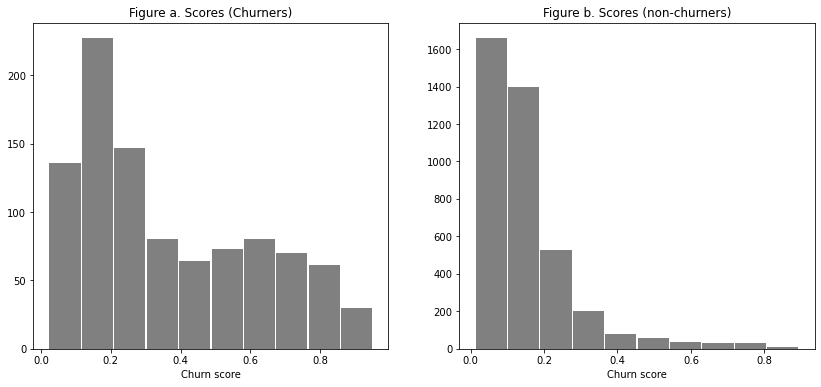

In [43]:
from matplotlib import pyplot as plt
plt.figure(figsize = (14,6))
plt.subplot(1, 2, 1)
plt.hist(scores[y == 1], color='gray', rwidth=0.96)
plt.title('Figure a. Scores (Churners)')
plt.xlabel('Churn score')
plt.subplot(1, 2, 2)
plt.hist(scores[y == 0], color='gray', rwidth=0.96)
plt.title('Figure b. Scores (non-churners)')
plt.xlabel('Churn score');

### Setting the cutoff

The default cutoff, used by the method `predict`, is 0.5:

In [44]:
ypred = logclf.predict(X)

Confusion matrix:

In [46]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, ypred)

array([[3897,  135],
       [ 664,  304]])

The accuracy returned by the method `logclf.score` corresponds to this matrix:

In [48]:
np.mean(y == ypred)

0.8402

Cutoff 0.2:

In [49]:
ypred = (scores > 0.2).astype('int')
confusion_matrix(y, ypred)

array([[3175,  857],
       [ 346,  622]])

The accuracy worsens:

In [50]:
np.mean(y == ypred)

0.7594

True positive and false positive rates:

In [51]:
tp = np.sum((y == 1) & (ypred == 1))/np.sum(y == 1)
fp = np.sum((y == 0) & (ypred == 1))/np.sum(y == 0)
round(tp, 3), round(fp, 3)

(0.643, 0.213)